<table style="width:100%; border: none;">
    <tr>
        <td colspan="3" style="text-align:center; border: none;">
            <img src="../assets/banner.svg" alt="Banner Image" style="width:100%;">
        </td>
    </tr>
    <!-- Add other rows and cells below if needed -->
</table>


This Notebook provides a complete workflow for downloading, processing, analyzing, and visualizing temperature data for various capital cities. Here's a step-by-step explanation of what each part of the code does:

1. **Loading Configuration**: The function `load_capitals_coordinates` reads a YAML configuration file to get the coordinates (latitude and longitude) of different capital cities.

2. **Downloading the Dataset**: The `get_cacheB_dataset` function downloads data from a specified Dataset URL. It uses the xarray library to handle the dataset efficiently.

3. **Preprocessing the Data**: The `preprocess` function extracts temperature data for a specific city, averages it over desire period, converts the temperature from Kelvin to Celsius and load the data in the machine memory.

4. **Basic Plotting**: The `basic_plot` function creates a simple line plot of the daily average temperature for a given city.

5. **Training a Forecast Model**: The `train_model` function prepares the data and trains a forecasting model using the Prophet library. It splits the data into training and testing sets [80%-20%]and fits the model to the training data. For more information please checkout the following link: [Prophet](https://facebook.github.io/prophet/docs/quick_start.html)


6. **Making Predictions**: The `make_predictions` function uses the trained model to make temperature predictions on the test data and calculates error metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

7. **Plotting Forecasts**: The `plot_forecast` function plots the training data, test data, and forecasted temperatures, allowing you to visually compare the model's predictions with the actual temperatures. It also provides options to display the plot and save it as an SVG file.



In [14]:
from utils import (load_config, get_cacheB_dataset,
                   basic_plot, make_predictions,
                   plot_forecast, preprocess, train_model)
import ipywidgets as widgets

In [15]:
config = load_config(file_path="config.yaml")
# Load capital coordinates from the YAML file
capitals_coordinates = config["capital_coordinates"]
# Create and display the dropdown
# Variable to store the selected coordinates
def display_coordinates(city):

    global selected_coordinates
    global selected_city
    selected_coordinates = capitals_coordinates[city]
    selected_city = city
    return selected_coordinates, selected_city

# Create and display the dropdown
widgets.interact(display_coordinates, city=sorted(list(capitals_coordinates.keys())))

interactive(children=(Dropdown(description='city', options=('Amsterdam', 'Athens', 'Berlin', 'Bratislava', 'Br…

<function __main__.display_coordinates(city)>

In [16]:
URL_DATASET = config["cacheb_url"]
# Get destine climate dt data
dataset = get_cacheB_dataset(url_dataset=URL_DATASET)
df = preprocess(dataset, lat=selected_coordinates[0], lon=selected_coordinates[1], method="nearest", resample_period="D")

## Basic Plot

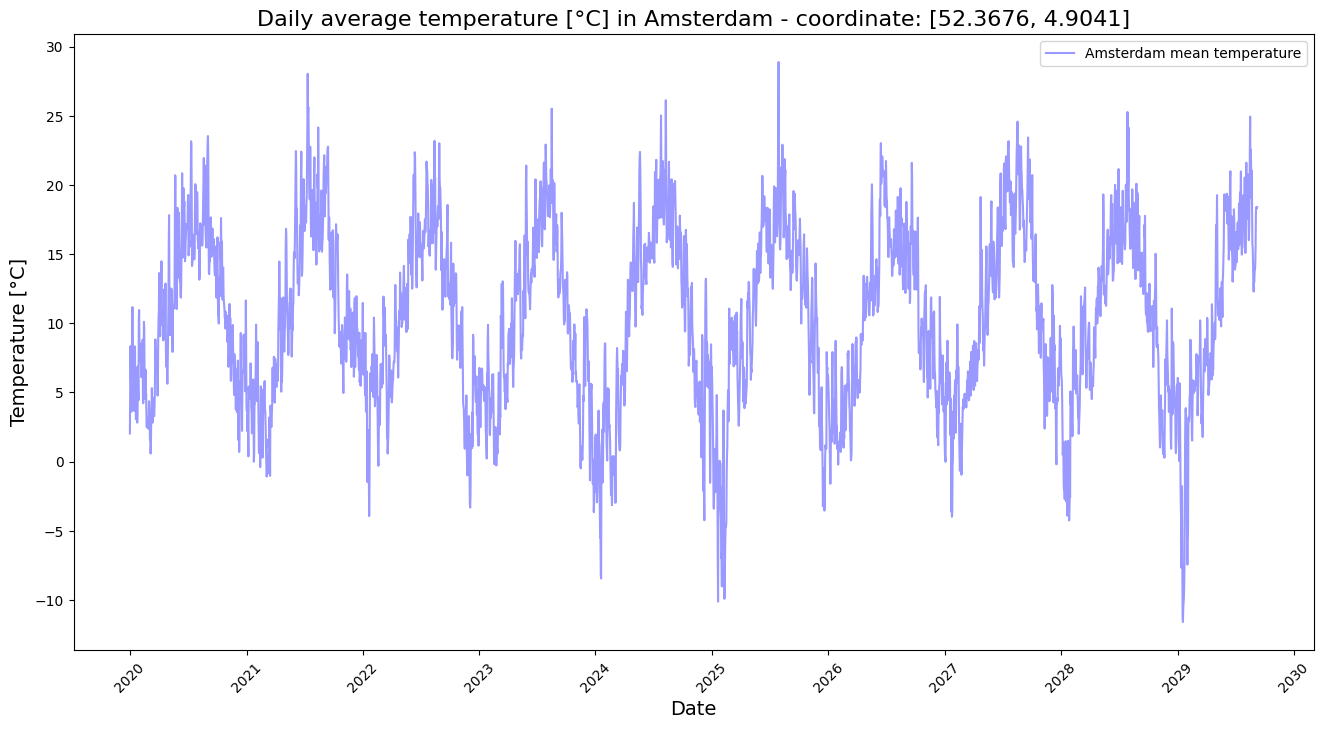

In [17]:
basic_plot(df, city=selected_city, coord=selected_coordinates)

## Train time serie model and plot the forecast

07:47:16 - cmdstanpy - INFO - Chain [1] start processing
07:47:16 - cmdstanpy - INFO - Chain [1] done processing


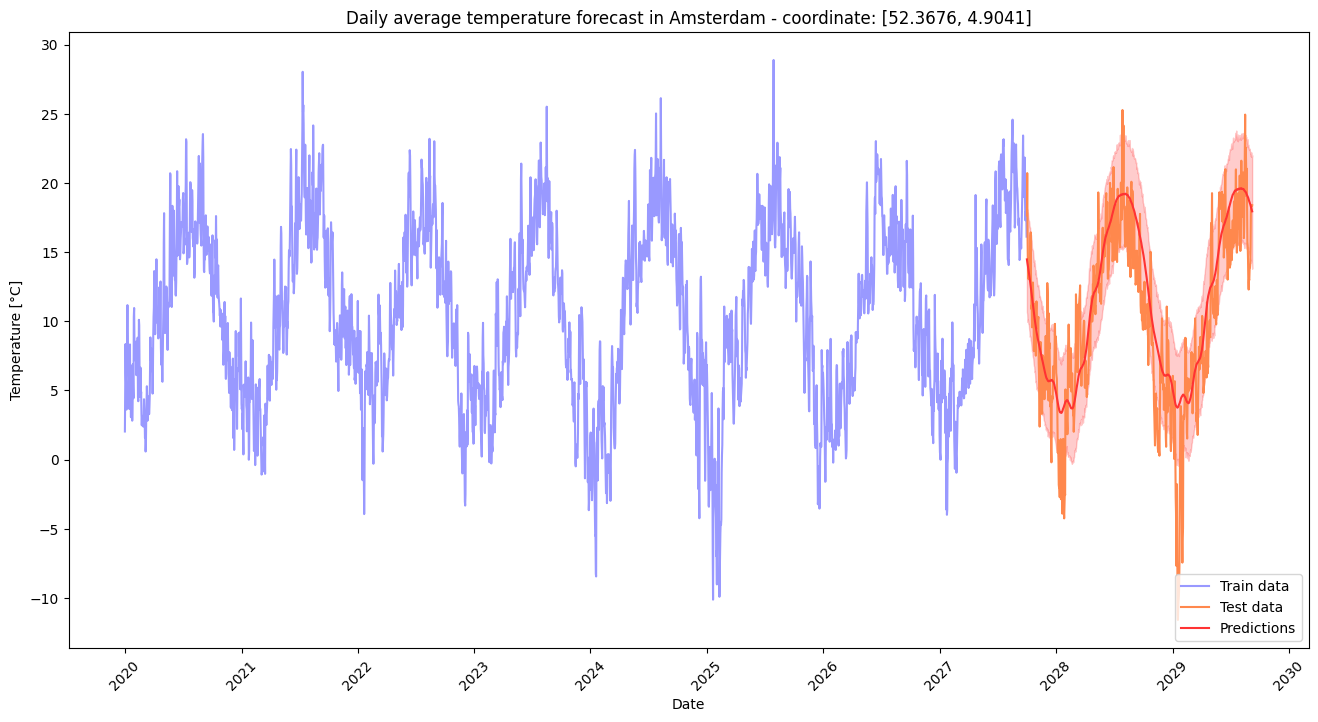

Mean Absolute Error: 2.64
Root Mean Squared Error: 3.46


In [18]:
model, train_df, test_df = train_model(df, date_col='time', temp_col='temperature')
df_forecast, mae, rmse = make_predictions(model, test_df)
plot_forecast(train_df=train_df,
              test_df=test_df,
              forecast=df_forecast,
              city=selected_city,
              coord=selected_coordinates,
              verbose=True, save=False)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# European capital forecast visualization

In [19]:
from utils import create_map_with_forecast, cacheB_forecast_map

In [20]:
cacheB_forecast_map(config=config)

Processing requests:   0%|                                              | 0/27 [00:00<?, ?request/s]2024-06-07 07:47:17.542 | INFO     | utils:cacheB_forecast_map:329 - cap: Amsterdam: coord: [52.3676, 4.9041]
07:47:23 - cmdstanpy - INFO - Chain [1] start processing
07:47:24 - cmdstanpy - INFO - Chain [1] done processing
Processing requests:   4%|█▍                                    | 1/27 [00:06<02:56,  6.80s/request]2024-06-07 07:47:24.347 | INFO     | utils:cacheB_forecast_map:329 - cap: Athens: coord: [37.9838, 23.7275]
07:47:34 - cmdstanpy - INFO - Chain [1] start processing
07:47:34 - cmdstanpy - INFO - Chain [1] done processing
Processing requests:   7%|██▊                                   | 2/27 [00:17<03:47,  9.11s/request]2024-06-07 07:47:35.070 | INFO     | utils:cacheB_forecast_map:329 - cap: Berlin: coord: [52.52, 13.405]
07:47:41 - cmdstanpy - INFO - Chain [1] start processing
07:47:41 - cmdstanpy - INFO - Chain [1] done processing
Processing requests:  11%|████▏       

In [21]:
m = create_map_with_forecast(capitals_coordinates=config["capital_coordinates"],
                             forecast_folder=config["output_folder"],
                             map_center=(48.8566, 2.3522),
                             zoom=6,
                             output_file='map.html')
m